In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\Users\parth003\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


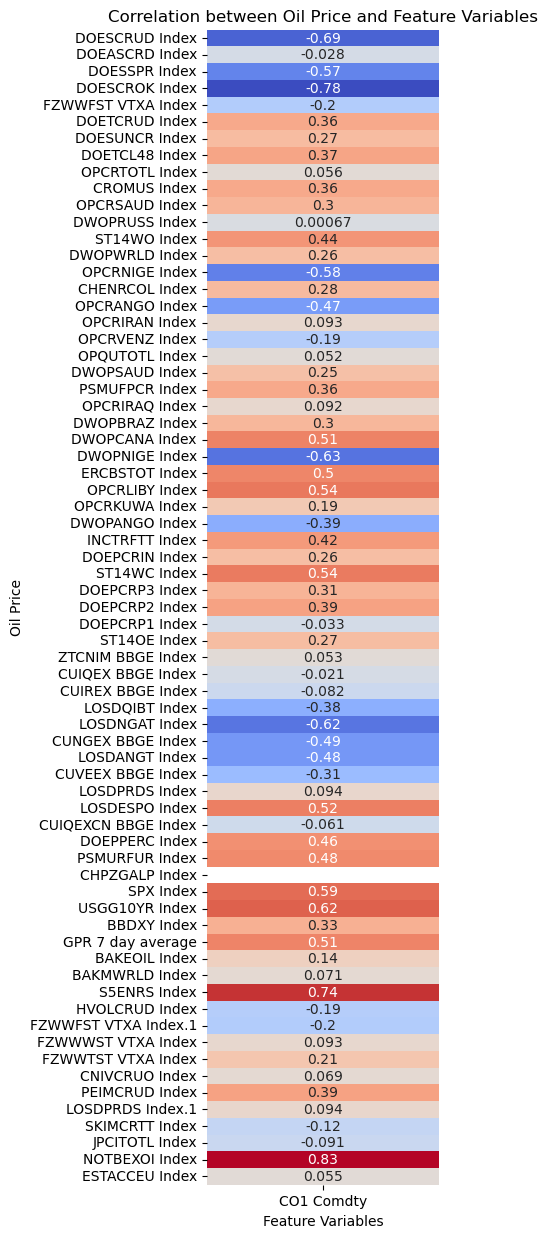

In [29]:
import seaborn as sns

# Load the dataset
file_path = 'crudeoil8 (1).csv'  # Change this to the path of your dataset
data = pd.read_csv(file_path)

# Calculate correlations
correlation_matrix = data.corr()

# Extract correlations with the oil price
oil_price_correlation = correlation_matrix.iloc[:, -1]

# Plot heatmap
plt.figure(figsize=(3, 15))
sns.heatmap(oil_price_correlation[:-1].to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between Oil Price and Feature Variables')
plt.xlabel('Feature Variables')
plt.ylabel('Oil Price')
plt.show()

In [30]:
# Load the dataset
# Load the dataset
file_path = 'crudeoil8 (1).csv'  # Change this to the path of your dataset
data = pd.read_csv(file_path)

y_index = -1  # Assuming oil price is in the last column
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, y_index]  # Target variable (oil prices)

In [31]:
# Finding the dimensions of X and y
num_samples, num_features = X.shape
num_samples_y = y.shape[0]

print("Dimension of X:", num_samples, "samples x", num_features, "features")
print("Dimension of y:", num_samples_y, "samples")

Dimension of X: 1808 samples x 69 features
Dimension of y: 1808 samples


In [32]:
# Split the data into training and validation sets
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Linear Least-Squares Regression
def linear_regression(X_train, X_val, y_train):
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_preds = linear_model.predict(X_val)
    return linear_preds

In [34]:
# Nonlinear Regression (Polynomial of degree 2)
def nonlinear_regression(X_train, X_val, y_train):
    X_train_poly = sm.add_constant(X_train)
    X_val_poly = sm.add_constant(X_val)
    poly_reg = sm.OLS(y_train, sm.add_constant(X_train_poly**2))
    poly_result = poly_reg.fit()
    poly_preds = poly_result.predict(X_val_poly**2)
    return poly_preds

In [35]:
# Kernel Ridge Regression
def kernel_ridge_regression(X_train, X_val, y_train):
    kernel_ridge_model = KernelRidge(kernel='rbf')
    kernel_ridge_model.fit(X_train, y_train)
    kernel_ridge_preds = kernel_ridge_model.predict(X_val)
    return kernel_ridge_preds

In [36]:
# Gaussian Process Regression
def gaussian_process_regression(X_train, X_val, y_train):
    gaussian_kernel = RBF(length_scale=1.0)
    gaussian_process_model = GaussianProcessRegressor(kernel=gaussian_kernel)
    gaussian_process_model.fit(X_train, y_train)
    gaussian_process_preds, _ = gaussian_process_model.predict(X_val, return_std=True)
    return gaussian_process_preds

In [37]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X.shape[1] - 1)
    sse = np.sum((y_true - y_pred)**2)
    return {'MSE': mse, 'R-squared': r2, 'Adjusted R-squared': adj_r2, 'Sum Squared Error': sse}

Linear Regression Metrics: {'MSE': 7.680705566180966, 'R-squared': 0.9778719786402404, 'Adjusted R-squared': 0.9726430968805713, 'Sum Squared Error': 2780.4154149575097}
Nonlinear Regression Metrics: {'MSE': 10.20147222828111, 'R-squared': 0.9706096798759803, 'Adjusted R-squared': 0.963664706969962, 'Sum Squared Error': 3692.9329466377617}
Kernel Ridge Regression Metrics: {'MSE': 4937.223074867117, 'R-squared': -13.224080941157531, 'Adjusted R-squared': -16.585250752595442, 'Sum Squared Error': 1787274.7531018965}
Gaussian Process Regression Metrics: {'MSE': 636.3620954965481, 'R-squared': -0.8333516264041076, 'Adjusted R-squared': -1.2665751271639825, 'Sum Squared Error': 230363.07856975042}


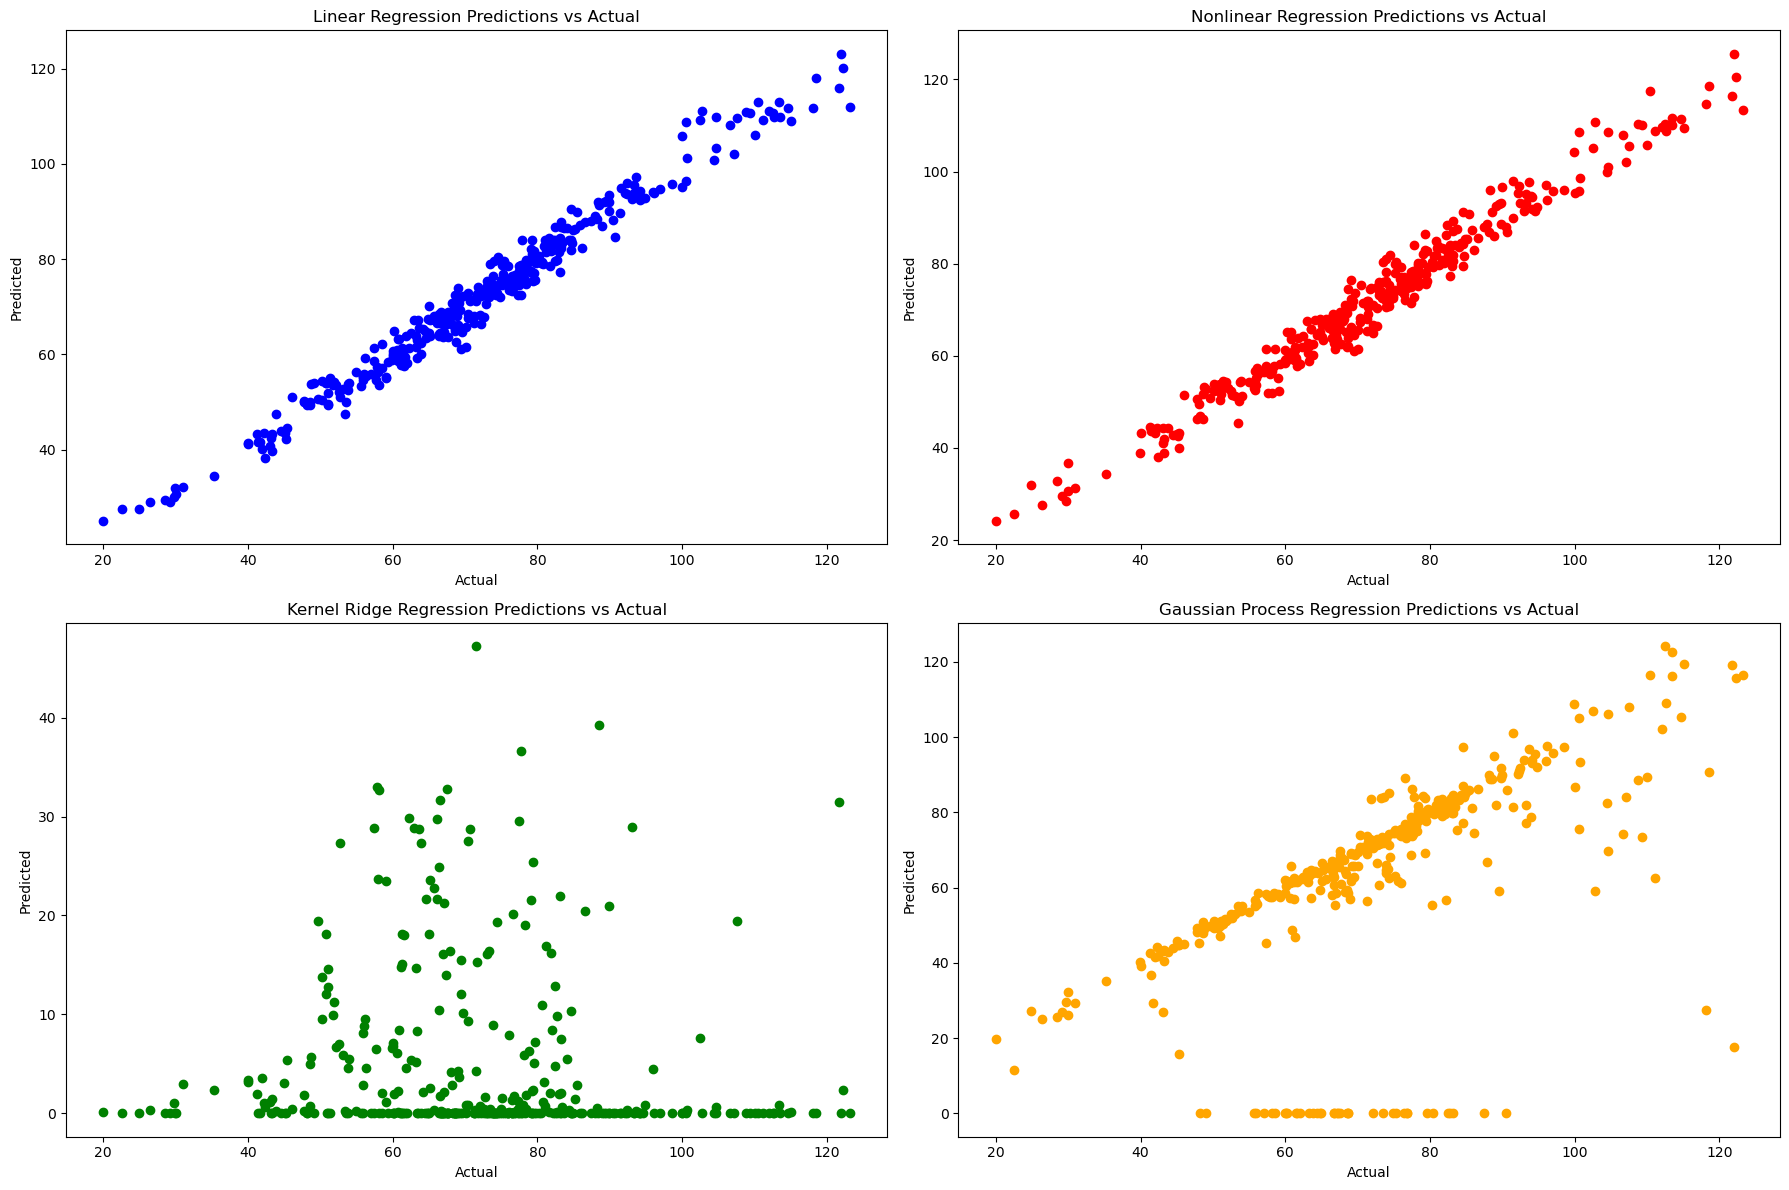

In [38]:

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = split_data(X, y)

    # Perform linear least-squares regression
    linear_preds = linear_regression(X_train, X_val, y_train)

    # Perform nonlinear regression
    poly_preds = nonlinear_regression(X_train, X_val, y_train)

    # Perform kernel ridge regression
    kernel_ridge_preds = kernel_ridge_regression(X_train, X_val, y_train)

    # Perform Gaussian process regression
    gaussian_process_preds = gaussian_process_regression(X_train, X_val, y_train)

 #Evaluate the models
    linear_metrics = evaluate_model(y_val, linear_preds)
    poly_metrics = evaluate_model(y_val, poly_preds)
    kernel_ridge_metrics = evaluate_model(y_val, kernel_ridge_preds)
    gaussian_process_metrics = evaluate_model(y_val, gaussian_process_preds)

# Print evaluation metrics
    print("Linear Regression Metrics:", linear_metrics)
    print("Nonlinear Regression Metrics:", poly_metrics)
    print("Kernel Ridge Regression Metrics:", kernel_ridge_metrics)
    print("Gaussian Process Regression Metrics:", gaussian_process_metrics)

# Visualize predictions vs actual values for each model
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.scatter(y_val, linear_preds, color='blue')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Linear Regression Predictions vs Actual')

    plt.subplot(2, 2, 2)
    plt.scatter(y_val, poly_preds, color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Nonlinear Regression Predictions vs Actual')

    plt.subplot(2, 2, 3)
    plt.scatter(y_val, kernel_ridge_preds, color='green')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Kernel Ridge Regression Predictions vs Actual')

    plt.subplot(2, 2, 4)
    plt.scatter(y_val, gaussian_process_preds, color='orange')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Gaussian Process Regression Predictions vs Actual')

    plt.tight_layout()
    plt.show()

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('crudeoil8 (1).csv')  # Change 'your_dataset.csv' to the actual filename

# Assuming the last column contains oil prices and the remaining columns are feature variables
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable (oil prices)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Kernel Ridge Regression': KernelRidge(kernel='rbf'),
    'Gaussian Process Regression': GaussianProcessRegressor(kernel=RBF()),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate MSE on training and validation sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    
    # Store results
    results[name] = {'MSE Training': mse_train, 'MSE Validation': mse_val}

# Print results
for name, metrics in results.items():
    print(name)
    print(metrics)
    print()

Linear Regression
{'MSE Training': 6.705888052462211, 'MSE Validation': 7.680705566180966}

Kernel Ridge Regression
{'MSE Training': 1168.2160037629415, 'MSE Validation': 4937.223074867117}

Gaussian Process Regression
{'MSE Training': 1.9179498729369666e-14, 'MSE Validation': 636.3620954965481}

